<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [6]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
penguim = sns.load_dataset('penguins')

In [8]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

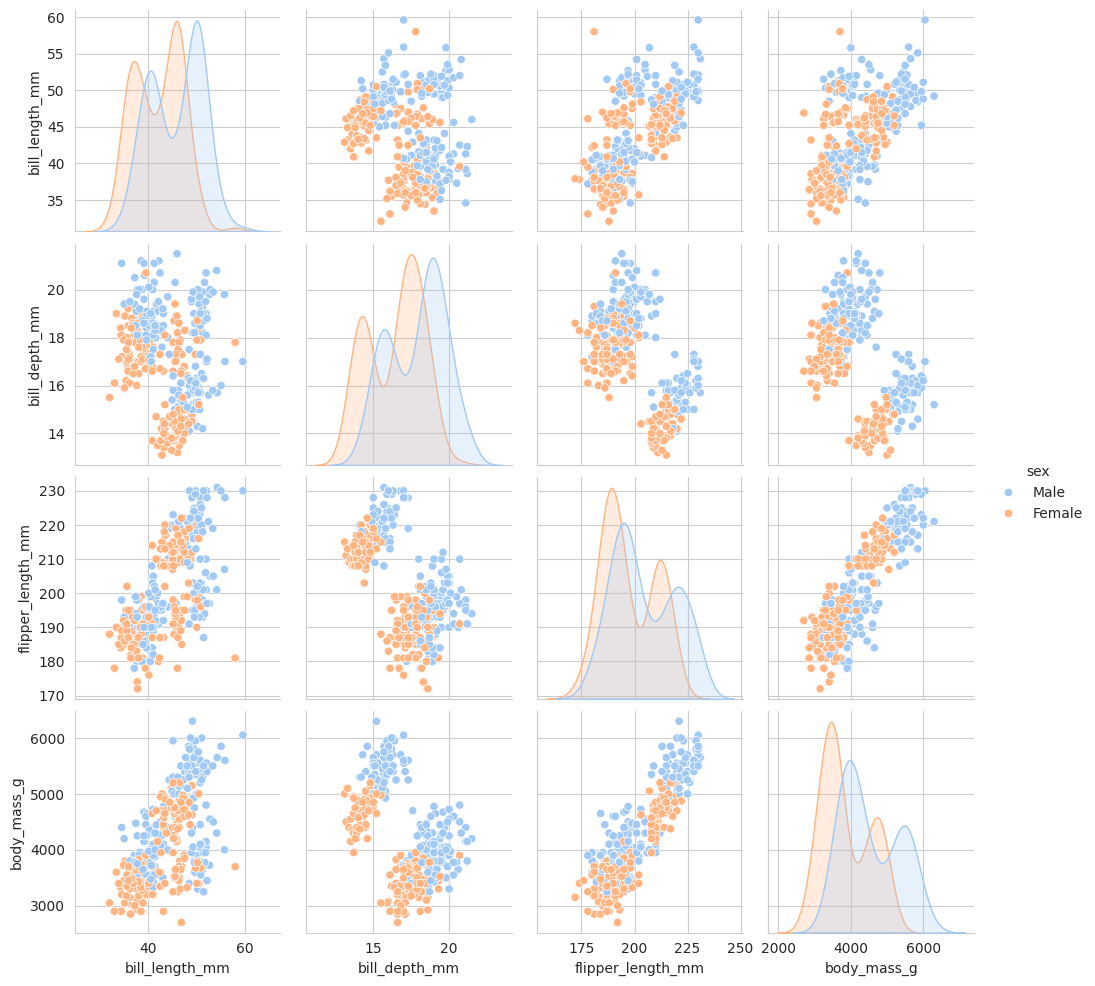

In [9]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Percebemos que os penguins do sexo masculino são maiores e mais pesados que as femeas.

 - Atributos por espécie:

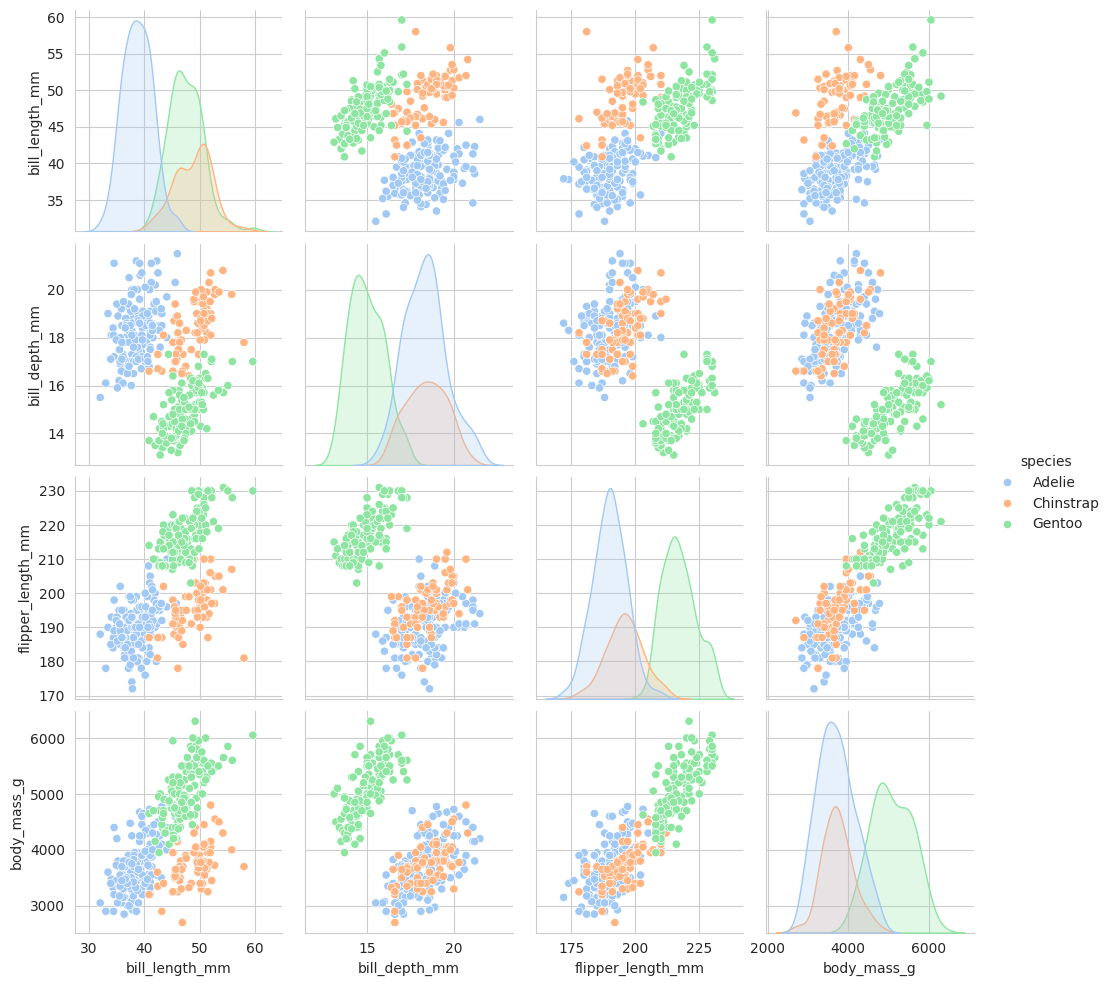

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:**

*   Aqui percebemos que os penguins da raça Gentoo são mais pesados porém com o bill_depth menor.
*   Ja as raças Adelie e Chinstrap são bem semelhantes.




 - Atributos por ilha:

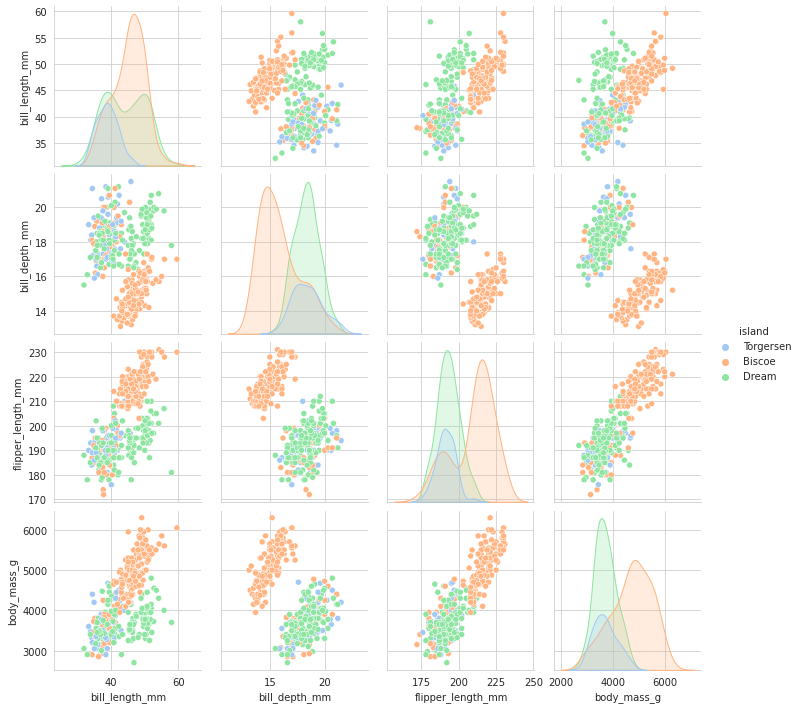

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Percebemos que os penguins com bill_depth e com a flipper_length grande estão concentrados na ilha Biscoe.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [11]:
# resposta da questão 2.1

penguim.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [12]:
penguim.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
penguim = penguim.dropna(how="any", axis=0)
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis numéricas**

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [14]:
# resposta da questão 2.2
def padronizar_coluna(data, nome_coluna):

    media = data[nome_coluna].mean()
    desvio_padrao = data[nome_coluna].std()

    data[f"{nome_coluna}_std"] = data[nome_coluna].apply(lambda x: (x - media) / desvio_padrao)

    return data

In [15]:
penguim[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


In [17]:
penguim = padronizar_coluna(penguim, 'bill_length_mm')
penguim = padronizar_coluna(penguim, 'bill_depth_mm')
penguim = padronizar_coluna(penguim, 'flipper_length_mm')

penguim.head()

<ipython-input-14-a5351b3756bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{nome_coluna}_std"] = data[nome_coluna].apply(lambda x: (x - media) / desvio_padrao)
<ipython-input-14-a5351b3756bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{nome_coluna}_std"] = data[nome_coluna].apply(lambda x: (x - media) / desvio_padrao)
<ipython-input-14-a5351b3756bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474


### **2.3. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [18]:
# resposta da questão 2.3
# atributo categorico nominal

# usando a tecnica de codificacao chamada 'one hot encoding'.
penguim['sex_m_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
penguim['sex_f_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

<ipython-input-18-d58b207e7e96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim['sex_m_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
<ipython-input-18-d58b207e7e96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim['sex_f_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)


In [19]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0


In [20]:
# tratando os dados da coluna "Island"
penguim["island"].drop_duplicates()

0     Torgersen
20       Biscoe
30        Dream
Name: island, dtype: object

In [21]:
penguim["island_torgesen"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Torgersen" else 0)
penguim["island_biscoe"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Biscoe" else 0)
penguim["island_dream"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Dream" else 0)

<ipython-input-21-1bcc10bb122f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim["island_torgesen"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Torgersen" else 0)
<ipython-input-21-1bcc10bb122f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim["island_biscoe"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Biscoe" else 0)
<ipython-input-21-1bcc10bb122f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [22]:

# tratando os dados da coluna "Species"
penguim["species"].drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

In [23]:
penguim["specie_adelie"] = penguim["species"].apply(lambda especie: 1 if especie == "Adelie" else 0)
penguim["specie_chinstrap"] = penguim["species"].apply(lambda especie: 1 if especie == "Chinstrap" else 0)
penguim["specie_gentoo"] = penguim["species"].apply(lambda especie: 1 if especie == "Gentoo" else 0)

<ipython-input-23-947fb16c53a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim["specie_adelie"] = penguim["species"].apply(lambda especie: 1 if especie == "Adelie" else 0)
<ipython-input-23-947fb16c53a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguim["specie_chinstrap"] = penguim["species"].apply(lambda especie: 1 if especie == "Chinstrap" else 0)
<ipython-input-23-947fb16c53a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

### **2.4. Limpeza**

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [24]:
# resposta da questão 2.4
data = penguim.drop(["island","bill_length_mm", "bill_depth_mm", "flipper_length_mm", "species", "sex"], axis=1)


In [25]:
data.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,island_torgesen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
0,3750.0,-0.894695,0.779559,-1.424608,1,0,1,0,0,1,0,0
1,3800.0,-0.821552,0.119404,-1.067867,0,1,1,0,0,1,0,0
2,3250.0,-0.675264,0.424091,-0.425733,0,1,1,0,0,1,0,0
4,3450.0,-1.333559,1.084246,-0.568429,0,1,1,0,0,1,0,0
5,3650.0,-0.858123,1.744400,-0.782474,1,0,1,0,0,1,0,0


### **2.5. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [27]:
# resposta da questão 2.5
# importando a biblioteca
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
# criando um modelo vazio
model = LinearRegression()

In [29]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
   data.drop(['body_mass_g'], axis=1),
    data['body_mass_g'],
    test_size=0.33,
    random_state=123
)


* Preditoras

In [30]:

predictors_train.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,island_torgesen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
84,-1.223843,0.322529,-0.711125,0,1,0,0,1,1,0,0
267,1.189907,-0.642313,1.714714,1,0,0,1,0,0,0,1
131,-0.163256,1.033465,-0.283036,1,0,1,0,0,1,0,0
67,-0.528976,0.982683,-0.925170,1,0,0,1,0,1,0,0
223,1.098477,-0.997781,1.215277,1,0,0,1,0,0,0,1


In [31]:
predictors_train.shape

(223, 11)

In [33]:
predictors_test.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m_nom,sex_f_nom,island_torgesen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
111,0.293894,1.592057,-0.711125,1,0,0,1,0,1,0,0
158,0.385324,0.525653,-1.638652,0,1,0,0,1,0,1,0
288,-0.090112,-1.505592,1.357973,0,1,0,1,0,0,0,1
308,0.641327,-1.607154,0.787187,0,1,0,1,0,0,0,1
185,1.281337,0.830340,0.145053,1,0,0,0,1,0,1,0


In [32]:
predictors_test.shape

(110, 11)

* Respostas

In [34]:
target_train.head()

84     3350.0
267    5400.0
131    3500.0
67     4100.0
223    5700.0
Name: body_mass_g, dtype: float64

In [35]:
target_train.shape

(223,)

In [36]:
target_test.head()

111    4600.0
158    3250.0
288    4700.0
308    4875.0
185    4100.0
Name: body_mass_g, dtype: float64

In [37]:
target_test.shape

(110,)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [39]:
# resposta da questão 3.1
model = model.fit(predictors_train, target_train)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'sex_m_nom', 'sex_f_nom', 'island_torgesen', 'island_biscoe',
        'island_dream', 'specie_adelie', 'specie_chinstrap',
        'specie_gentoo'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([ 132.90998703,  156.11051727,  213.79329032,  185.05460499,
        -185.05460499,  -56.8413219 ,   22.02748221,   34.81383969,
        -225.77619674, -538.34481195,  764.12100869]),
 'rank_': 8,
 'singular_': array([2.39939919e+01, 1.54190455e+01, 1.09565999e+01, 6.05161850e+00,
        5.75044839e+00, 5.23634488e+00, 3.24444459e+00, 2.08280233e+00,
        2.00857953e-15, 1.48340503e-15, 1.13826568e-15]),
 'intercept_': 4115.073304511302}

In [40]:
model = model.fit(predictors_train, target_train)

In [41]:
a = model.coef_
print(a)

[ 132.90998703  156.11051727  213.79329032  185.05460499 -185.05460499
  -56.8413219    22.02748221   34.81383969 -225.77619674 -538.34481195
  764.12100869]


In [42]:
b = model.intercept_
print(b)

4115.073304511302


### **3.2. Avaliação**

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [43]:
# resposta da questão 3.2
from sklearn.metrics import mean_squared_error
target_predicted = model.predict(predictors_test)

In [44]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

295.8646687275044


## 4\. Predição  

### **4.1. Novo penguim**

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [46]:
# resposta da questão 4.1



---